# <p style="text-align: center;">EE 380L: Data Mining</p>
# <p style="text-align: center;">Assignment 3</p>
## <p style="text-align: center;">Total points: 100  </p>
## <p style="text-align: center;">Due: October 15th(10/15/2020) submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UT eID for both students. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)*

For the descriptive questions, you can write down the solution in paper and embed a picture of it to the notebook or type it out.

# Question 1 - Stochastic Gradient Descent (25 pts)
 1. (5pts) Using stochastic gradient descent, derive the coefficent updates for all 4 coefficients of the model: 
$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$ 


 2. (20pts) Write Python code for an SGD solution to the non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$  Try to format similarly to scikit-learn's models. The template of the class is given. The init function of the class takes as input the learning_rate, regularization_constant and number of epochs. The fit method must take as input X,y. The _predict_ method takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100] . Plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) for the best 2 combinations of learning_rate and regularization for SGD. (2pts) Report the MSE at the end of 15 epochs for the two best combinations.


In [1]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        
    def sgd(self, gradient):
        self.coef # = please fill this to update self.coef using SGD
    
        
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                   #please fill this
                # Compute gradients
                    #please fill this
               
                # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))
        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    #def linearPredict(self, X):  
        #compute dot product of self.coef and X
        
        

In [2]:
data = pd.read_csv('q1_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

## Answer 

### 1.

### 2.

### Using SGD


# Question 2 - MLP Regressor(15 pts) 

In this question, you will explore the application of Multi-layer Perceptron (MLP) regression using sklearn package in Python; http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html.

The following code will pre-process the data and split the data into training and test sets using train_test_split with random state 30 and test_size = 0.25.

The dataset is loaded from q2_data.csv which contains features of engine and the predictor varialble is "mpg". The features are:
* cylinders 
* displacement
* horsepower
* weight
* acceleration

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import glob
%matplotlib inline


df = pd.read_csv('q2_data.csv') 
df.dropna(inplace=True)
df.columns
y = df['mpg'].values
X = df.drop(['mpg'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=30)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(294, 5) (294,) (98, 5) (98,)



We also want to use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on the original data, we use StandardScaler to center each feature ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Also remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.



   
1) (**5pts**) Now, use the parameters for MLP Regressor as below to train a MLPRegressor models on the entire training set and report the RMSE score for both the trainnig and testing sets (again, use StandardScaler) for the different number of hidden units.

   (a) *hidden_layer_sizes = (5,)* 
   
   (b) *hidden_layer_sizes = (15,)*
   
   (c) *hidden_layer_sizes = (50,)*

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42, batch_size= 20,       learning_rate_init = 0.005
    
   Which of the three models ((a)-(c)) performs the best? Briefly analyze and discuss the results, commenting on the number of hidden units.


2) (**5pts**) MLPRegressor has a built-in attribute *loss\_curve\_* which returns the loss at each epoch (misleadingly referred to as "iteration" in scikit documentation, though they use epoch in the actual code!). For example, if your model is named as *my_model* you can call it as *my\_model.loss\_curve\_* ([example](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py)). Plot three curves using the following three conditions (a, b, c) in one figure, where *X-axis* is epoch  number and *Y-axis* is squared root of *loss\_curve\_*:

   (a) *hidden_layer_sizes = (5,)* 
   
   (b) *hidden_layer_sizes = (15,)*
   
   (c) *hidden_layer_sizes = (50,)* 

   
3) (**5pts**) Now, use the parameters for MLP Regressor as below to train a MLPRegressor models on the entire training set for different batch size. 

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,learning_rate_init = 0.005 , hidden_layer_sizes = (15,)
   
   Plot three different figures for the three batch size, where *X-axis* is epoch  number and *Y-axis* is squared root of *loss\_curve\_*: 

   (a) *batch_size = 1* 
   
   (b) *batch_size = 20*  
   
   (c) *batch_size = 2000* 
     
   **Compare the three plots obtained comment on the gradient updates. What do you understand about the difference between batch_size = 1, 20 and 2000.**

# Question 3: Tensor Playground (15 points)
Visit https://playground.tensorflow.org for this problem

From the far right, select "Classification" as the problem type, and select the data set on the top right (alternate colored squares).

Use these settings as the DEFAULT settings for all subquestions: test/training ratio = 50%, Noise = 0, Batch Size = 30, learning rate = 0.03, activation = tanh, one hidden layer with 2 neurons, input as $X_1$, $X_2$ and no Regularization.

1) Use the DEFAULT setting and run two experiments - one using Tanh as the activation function and one using the linear activation function. Report the train, test losses for both these experiments at the end of 1000 epochs. What qualitative difference do you observe in the decision boundaries obtained? Why? (4 pts)

We will now study the effect of certain variations in the network structure or training, keeping all other aspects the same as in the default configuration specified above, and with tanh as the activation for hidden units.

2) Effect of number of hidden units: Go back to DEFAULT settings and report the train, test losses at the end of 1000 epochs for 4 and 8 neurons in the hidden layer (2 pairs of results). What do you observe regarding the decision boundary as the number of neurons increases? Why? (4 pts)

3) Effect of learning rate and number of epochs: Go back to DEFAULT settings and set the activation to be Relu and have four neurons in the hidden layer. Report the train, test losses at the end of 100 epochs and 1000 epochs for learning rates of 10, 0.1, 0.01 and 0.001 (8 pairs of results). What do you observe in the loss curves? Explain. (4 pts)

4) Go back to DEFAULT settings. Play around with any of the other hyperparameters, network architectures and input features (such as $\sin(X_1), X_1^2$ etc.) and report the best train/test loss you could get (test loss should be at most 0.06). Attach the screenshot from Tensor playground for the same (show your full network, output and parameters). Briefly justify your decisions, and comment on difficulties/tradeoffs, what helps/what doesn't,etc. (3 pts)

# Question 4 - Feature Selection (20 pts)

In this question, we will explore the importance of feature selection, You can use the below code to load the dataset "zoo.csv". This dataset contains a set of features for different animals and the output is class_type 
corresponding to the features. The details of class_type is present in class.csv for your reference.

1. Plot the correlation matrix. The resulting correlation plot should be (n_features * n_features) matrix. List the top 5 most positively correlated features with class_type. (**3pts**)

2. List the top 5 most negatively correlated features with class_type. (**3pts**)

3. Use https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE to perform feature selection with estimator = LogisticRegression(max_iter=1000) estimator. List the top 5 features selected from RFE.(**2pts**)

* Create a train_test split of 80:20(train:test) with random state = 50

* We need to use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on the original data, we use StandardScaler to center each feature ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Also remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.

4. Train a MLP Regressor with train data and report the ${R^2}$ score on the test set for each of the following, 

   a) Model trained with top 5 most positvely correlated features from part 1
   
   b) Model trained with top 5 most negatively correlated features from part 2
   
   c) Model trained with five features selected by RFE from part 3
   
   d) Finally train a MLP Regressor on the entire training data with the entire orignal features.Use the default values for MLPRegressor as below(**8pts**)

    MLPRegressor(max_iter = 1000,random_state=1)

5. Explain your results based on your understanding of feature selection and the ${R^2}$ score.  (**4pts**) 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("zoo.csv")
df.columns
y = df['class_type'].values
X = df.drop(['class_type','animal_name'], axis = 1)

In [2]:
class_df = pd.read_csv("class.csv")

In [14]:
# df

In [3]:
# df_tmp = df.copy(deep = True)
i = 0
while i < df.shape[0]:
    if df.iat[i, 17] < 6:
        df.iat[i, 17] = 1
    else:
        df.iat[i, 17] = 0
    i = i + 1

In [11]:
# df_tmp

# 1) & 2)

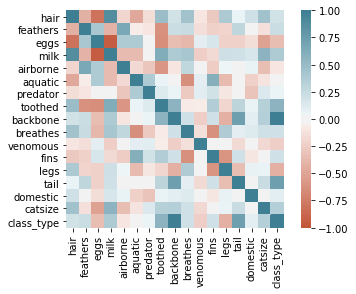

In [4]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin = -1, vmax = 1, center = 0,
    cmap = sns.diverging_palette(20, 220, n = 200),
    square = True
)

In [5]:
corr_s = corr.mask(np.tril(np.ones(corr.shape)).astype(np.bool))
corr_s = corr_s[['class_type',]]
corr_s_p = corr_s[corr_s > 0].stack().reset_index()
corr_s_p.sort_values(by = [0], ascending = False).head(5)

,level_0,level_1,0
6,backbone,class_type,1.000000
9,tail,class_type,0.731762
5,toothed,class_type,0.575085
2,milk,class_type,0.384958
11,catsize,class_type,0.356976


In [6]:
corr_s_n = corr_s[corr_s < 0].stack().reset_index()
corr_s_n.sort_values(by = [0], ascending = True).head()

,level_0,level_1,0
3,legs,class_type,-0.432856
0,eggs,class_type,-0.340420
2,venomous,class_type,-0.246611
1,airborne,class_type,-0.104718


# 3)

In [7]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 50)
estimator = LogisticRegression(max_iter = 1000)
selector = RFE(estimator, n_features_to_select = 5, step = 1)
selector = selector.fit(X, y)
# selector.support_

print ("Features sorted by their rank:")
print (sorted(zip(map(float, selector.ranking_), X.columns)))

Features sorted by their rank:
[(1.0, 'backbone'), (1.0, 'feathers'), (1.0, 'milk'), (1.0, 'tail'), (1.0, 'toothed'), (2.0, 'catsize'), (3.0, 'breathes'), (4.0, 'eggs'), (5.0, 'legs'), (6.0, 'aquatic'), (7.0, 'venomous'), (8.0, 'hair'), (9.0, 'fins'), (10.0, 'domestic'), (11.0, 'airborne'), (12.0, 'predator')]


**The top 5 features by RFE: backbone, feathers, milk, tail, toothed**

In [8]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
# X.head()
X_train_a = X_train[:, [3, 7, 8, 13, 15]]
X_train_b = X_train[:, [2, 4, 10, 11]]
X_train_c = X_train[:, [1, 3, 7, 8, 13]]
X_test_a = X_test[:, [3, 7, 8, 13, 15]]
X_test_b = X_test[:, [2, 4, 10, 11]]
X_test_c = X_test[:, [1, 3, 7, 8, 13]]

MLP = MLPRegressor(max_iter = 1000, random_state = 1)
MLP_a = MLPRegressor(max_iter = 1000, random_state = 1)
MLP_b = MLPRegressor(max_iter = 1000, random_state = 1)
MLP_c = MLPRegressor(max_iter = 1000, random_state = 1)

In [9]:
MLP_a.fit(X_train_a, y_train)
r2_a = r2_score(MLP_a.predict(X_test_a), y_test)

MLP_b.fit(X_train_b, y_train)
r2_b = r2_score(MLP_b.predict(X_test_b), y_test)

MLP_c.fit(X_train_c, y_train)
r2_c = r2_score(MLP_c.predict(X_test_c), y_test)

MLP.fit(X_train, y_train)
r2 = r2_score(MLP.predict(X_test), y_test)

In [10]:
print("Top 5 most positvely correlated features R^2:", r2_a)
print("Top 5 most negatively correlated features R^2:", r2_b)
print("Top 5 features selected by RFE R^2:", r2_c)
print("All features R^2:", r2)

Top 5 most positvely correlated features R^2: 0.98487409396085
Top 5 most negatively correlated features R^2: -1.9775367552768972
Top 5 features selected by RFE R^2: 0.9986347135585708
All features R^2: 0.9510122697725267


# Question 5 (Data Pre-processing - 25pts)
The following dataset contains House Sales data in King County, USA. This dataset contains house sale prices for King County, which includes Seattle. This dataset contains the following columns:

* bedrooms: Number of Bedrooms/House
* bathrooms: Number of bathrooms/bedrooms
* sqft_living: Square footage of the home
* sqft_lot: Square footage of the lot
* floors: Total floors (levels) in house
* waterfront: House which has a view to a waterfront (0/1)
* view: Has been viewed (0-4)
* condition: How good the condition is Overall (1-5)
* grade: Overall grade given to the housing unit, based on King County grading system (1-13)
* sqft_above: Square footage of house apart from basement
* sqft_basement: Square footage of the basement
* yr_built: Built Year
* yr_renovated: Year when house was renovated
* zipcode: Zip code
* price: Selling price of house

Here, price is the dependent variable while all other variables are assumed to be independent variables. Here, 10% cells of most columns in the dataset contain NaN value.

In [39]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

np.random.seed(100)

df = pd.read_csv("kc_house_data.csv")
age = df['yr_renovated']
built = df['yr_built']
df.iloc[:, :-1] = df[:-1].mask(np.random.random(df[:-1].shape)<0.1)
df['yr_renovated'] = age
df['yr_built'] = built
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price
0,3.0,1.00,1180.0,5650.0,NaN,0.0,0.0,3.0,7.0,1180.0,0.0,1955,0,98178.0,221900.0
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951,1991,98125.0,538000.0
2,2.0,1.00,770.0,10000.0,NaN,0.0,0.0,NaN,6.0,770.0,0.0,1933,0,NaN,180000.0
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965,0,NaN,604000.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987,0,98074.0,510000.0


### Question 5.1 (5 points)
Print the number of NaN values in each column. Next, if the value of yr_renovated is equal to 0, set it equal to the corresponding value of yr_built.



In [40]:
print(df.isna().sum())

bedrooms         2150
bathrooms        2150
sqft_living      2170
sqft_lot         2091
floors           2152
waterfront       2179
view             2184
condition        2096
grade            2135
sqft_above       2163
sqft_basement    2198
yr_built            0
yr_renovated        0
zipcode          2169
price               0
dtype: int64


In [41]:
i = 0
while i < df.shape[0]:
    if df.iat[i, 12] == 0:
        df.iat[i, 12] = df.iat[i, 11]
    i = i + 1
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price
0,3.0,1.00,1180.0,5650.0,NaN,0.0,0.0,3.0,7.0,1180.0,0.0,1955,1955,98178.0,221900.0
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951,1991,98125.0,538000.0
2,2.0,1.00,770.0,10000.0,NaN,0.0,0.0,NaN,6.0,770.0,0.0,1933,1933,NaN,180000.0
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965,1965,NaN,604000.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987,1987,98074.0,510000.0


### Question 5.2 (6 points)

Create a copy of df named df_dm and create a new column in df_dm named binned_yr_built and apply binning to the column yr_built. Use pandas.cut() and modify its paramter list as below:

bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]
labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']
include_lowest=True

Next, perform one-hot encoding using this new column.

In [42]:
df_dm = df

In [43]:
df_dm['binned_yr_built'] = pd.cut(df_dm['yr_built'], bins = [1900, 1920, 1940, 1960, 1980, 2000, 2020], labels = ['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020'], include_lowest=True)
df_dm.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price,binned_yr_built
0,3.0,1.00,1180.0,5650.0,NaN,0.0,0.0,3.0,7.0,1180.0,0.0,1955,1955,98178.0,221900.0,1940-1960
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951,1991,98125.0,538000.0,1940-1960
2,2.0,1.00,770.0,10000.0,NaN,0.0,0.0,NaN,6.0,770.0,0.0,1933,1933,NaN,180000.0,1920-1940
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965,1965,NaN,604000.0,1960-1980
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987,1987,98074.0,510000.0,1980-2000


In [44]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df_dm['binned_yr_built'] = labelencoder.fit_transform(df_dm['binned_yr_built'])
one_hot_encoder = OneHotEncoder()
enc_df = pd.DataFrame(one_hot_encoder.fit_transform(df_dm[['binned_yr_built']]).toarray())
df_dm = df_dm.join(enc_df)
df_dm.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_renovated,zipcode,price,binned_yr_built,0,1,2,3,4,5
0,3.0,1.00,1180.0,5650.0,NaN,0.0,0.0,3.0,7.0,1180.0,...,1955,98178.0,221900.0,2,0.0,0.0,1.0,0.0,0.0,0.0
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,...,1991,98125.0,538000.0,2,0.0,0.0,1.0,0.0,0.0,0.0
2,2.0,1.00,770.0,10000.0,NaN,0.0,0.0,NaN,6.0,770.0,...,1933,NaN,180000.0,1,0.0,1.0,0.0,0.0,0.0,0.0
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,...,1965,NaN,604000.0,3,0.0,0.0,0.0,1.0,0.0,0.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,...,1987,98074.0,510000.0,4,0.0,0.0,0.0,0.0,1.0,0.0


### Question 5.3 (4 points)

Create a copy of df named temp_df. Drop all rows in temp_df that contain any null value and run a linear regression model using a train-test split with test_size=0.3 and random_state=42.


In [45]:
temp_df = df.drop(['binned_yr_built'], axis = 1)
temp_df = temp_df.dropna(how = 'any', axis = 0)
temp_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951,1991,98125.0,538000.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987,1987,98074.0,510000.0
6,3.0,2.25,1715.0,6819.0,2.0,0.0,0.0,3.0,7.0,1715.0,0.0,1995,1995,98003.0,257500.0
9,3.0,2.50,1890.0,6560.0,2.0,0.0,0.0,3.0,7.0,1890.0,0.0,2003,2003,98038.0,323000.0
10,3.0,2.50,3560.0,9796.0,1.0,0.0,0.0,3.0,8.0,1860.0,1700.0,1965,1965,98007.0,662500.0


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = temp_df.drop(['price'], axis = 1)
y = temp_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
reg_53 = LinearRegression()
reg_53.fit(X_train, y_train)
r2 = r2_score(reg_53.predict(X_test), y_test)
print("Drop all NaN R^2:", r2)

Drop all NaN R^2: 0.6166321682255717


### Question 5.4 (8 points)

Use `df` to create a train/test split with `test_size=0.30` and `random_state=42`. Use the following imputation methods to fill in all NaN values for the obtained training set.
- mean (using [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer))
- median (using [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer))
- most_frequent (using [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer))
- k-Nearest Neighbors (using [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer)) - Run this four times with the value of `n_neighbors` = 2, 5, 10 and 20.

For each method, impute the test set with the same imputer and print the test $R^2$ score obtained using a LinearRegressor. Which method gives the best result? What can you say from the result of a) SimpleImputer and b) KNNImputer?

In [46]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp_median = SimpleImputer(missing_values = np.nan, strategy = 'median')
imp_most_frequent = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

In [51]:
df_mean = df.drop(['binned_yr_built'], axis = 1)
cname = df_mean.columns.values.tolist()
imp_mean.fit(df_mean)
df_mean = imp_mean.transform(df_mean)
df_mean = pd.DataFrame(df_mean)
df_mean.columns = cname
# df_mean.head()

X = df_mean.drop(['price'], axis=1)
y = df_mean['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
reg_mean = LinearRegression()
reg_mean.fit(X_train, y_train)
r2_mean = r2_score(reg_mean.predict(X_test), y_test)

In [52]:
df_median = df.drop(['binned_yr_built'], axis = 1)
cname = df_median.columns.values.tolist()
imp_median.fit(df_median)
df_median = imp_median.transform(df_median)
df_median = pd.DataFrame(df_median)
df_median.columns = cname
# df_median.head()

X = df_median.drop(['price'], axis=1)
y = df_median['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
reg_median = LinearRegression()
reg_median.fit(X_train, y_train)
r2_median = r2_score(reg_median.predict(X_test), y_test)

In [53]:
df_most_frequent = df.drop(['binned_yr_built'], axis = 1)
cname = df_most_frequent.columns.values.tolist()
imp_most_frequent.fit(df_most_frequent)
df_most_frequent = imp_most_frequent.transform(df_most_frequent)
df_most_frequent = pd.DataFrame(df_most_frequent)
df_most_frequent.columns = cname
# df_most_frequent.head()

X = df_most_frequent.drop(['price'], axis=1)
y = df_most_frequent['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
reg_most_frequent = LinearRegression()
reg_most_frequent.fit(X_train, y_train)
r2_most_frequent = r2_score(reg_most_frequent.predict(X_test), y_test)

In [54]:
print("Mean R^2:", r2_mean)
print("Median R^2:", r2_median)
print("Most_frequent R^2:", r2_most_frequent)

Mean R^2: 0.38743354065167923
Median R^2: 0.37377985095960475
Most_frequent R^2: 0.35689773209815134


In [56]:
from sklearn.impute import KNNImputer
imputer_2 = KNNImputer(n_neighbors = 2)
imputer_5 = KNNImputer(n_neighbors = 5)
imputer_10 = KNNImputer(n_neighbors = 10)
imputer_20 = KNNImputer(n_neighbors = 20)

In [60]:
df_2 = df.drop(['binned_yr_built'], axis = 1)
cname = df_2.columns.values.tolist()
df_2 = pd.DataFrame(imputer_2.fit_transform(df_2))
df_2.columns = cname

X = df_2.drop(['price'], axis = 1)
y = df_2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
reg_2 = LinearRegression()
reg_2.fit(X_train, y_train)
r2_2 = r2_score(reg_2.predict(X_test), y_test)

In [61]:
df_5 = df.drop(['binned_yr_built'], axis = 1)
cname = df_5.columns.values.tolist()
df_5 = pd.DataFrame(imputer_5.fit_transform(df_5))
df_5.columns = cname

X = df_5.drop(['price'], axis = 1)
y = df_5['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
reg_5 = LinearRegression()
reg_5.fit(X_train, y_train)
r2_5 = r2_score(reg_5.predict(X_test), y_test)

In [62]:
df_10 = df.drop(['binned_yr_built'], axis = 1)
cname = df_10.columns.values.tolist()
df_10 = pd.DataFrame(imputer_10.fit_transform(df_10))
df_10.columns = cname

X = df_10.drop(['price'], axis = 1)
y = df_10['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
reg_10 = LinearRegression()
reg_10.fit(X_train, y_train)
r2_10 = r2_score(reg_10.predict(X_test), y_test)

In [63]:
df_20 = df.drop(['binned_yr_built'], axis = 1)
cname = df_20.columns.values.tolist()
df_20 = pd.DataFrame(imputer_20.fit_transform(df_20))
df_20.columns = cname

X = df_20.drop(['price'], axis = 1)
y = df_20['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
reg_20 = LinearRegression()
reg_20.fit(X_train, y_train)
r2_20 = r2_score(reg_20.predict(X_test), y_test)

In [64]:
print("n_neighbors = 2 R^2:", r2_2)
print("n_neighbors = 5 R^2:", r2_5)
print("n_neighbors = 10 R^2:", r2_10)
print("n_neighbors = 20 R^2:", r2_20)

n_neighbors = 2 R^2: 0.48666108841391986
n_neighbors = 5 R^2: 0.49721907889982586
n_neighbors = 10 R^2: 0.5041724709524094
n_neighbors = 20 R^2: 0.50627373804905


### Question 5.5 (2 points)
In Questions 5.3 and 5.4, when you dropped all rows containing any null value, you obtained better $R^2$ score than when you imputed the missing values. What can be some possible reasons behind this?